# **Modelling and Evaluation Notebook**

## Objectives

* Fulfill Business Requirements 2 - predict if a cherry leaf is healthy or contains powdery mildew.

## Inputs

* inputs/cherry_leaves_dataset/cherry_leaves/train
* inputs/cherry_leaves_dataset/cherry_leaves/validation
* inputs/cherry_leaves_dataset/cherry_leaves/test

## Outputs

* Image Augmentation.
* Image distribution plot, train vs validation vs test.
* Machine learning model creation and training.
* Plotting model performance.
* Prediction of a selected image file.



---

# Set Working Directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/cherry-leaves-mildew-detection/jupyter_notebooks'

In [2]:
os.chdir("/workspace/cherry-leaves-mildew-detection")
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/cherry-leaves-mildew-detection'

### Set Input Directories

In [4]:
data_dir = "inputs/cherry_leaves_dataset/cherry_leaves"
train_dir = data_dir + "/train"
val_dir = data_dir + "/validation"
test_dir = data_dir + "/test"

### Set Output Directory

In [5]:
version = "v2"
file_path = f"outputs/{version}"
if "outputs" in os.listdir(current_dir) and version in os.listdir(current_dir + "/outputs"):
    print("This directory exists, create a new version.")
else:
    os.makedirs(name=file_path)

This directory exists, create a new version.


### Set Label Names

In [6]:
labels = os.listdir(train_dir)
print("The image labels are", labels)

The image labels are ['healthy', 'powdery_mildew']


---

# Import Image Shape

In [7]:
import joblib

image_shape = joblib.load(filename=f"outputs/v1/image_shape_embed.pkl")
image_shape

(256, 256, 3)

---

# Label Frequency Per Set

### Image Distribution Per Label Per Set

/tmp/ipykernel_12605/664944259.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_label_frequency = df_label_frequency.append(pd.Series(data={"Dataset": set,
/tmp/ipykernel_12605/664944259.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_label_frequency = df_label_frequency.append(pd.Series(data={"Dataset": set,
/tmp/ipykernel_12605/664944259.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_label_frequency = df_label_frequency.append(pd.Series(data={"Dataset": set,
/tmp/ipykernel_12605/664944259.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_label_frequency = df_label_frequency.append(pd.Series(data={"Dataset

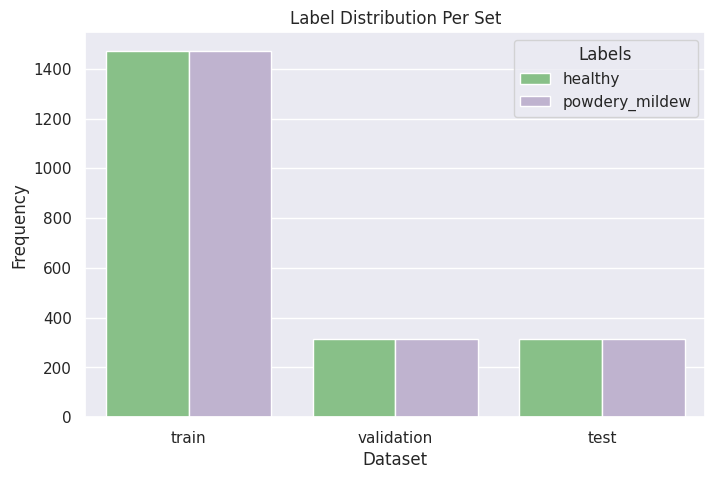

In [51]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

df_label_frequency = pd.DataFrame([])
for set in ["train", "validation", "test"]:
    for label in labels:
        count = int(len(os.listdir(data_dir + "/" + set + "/" + label)))
        df_label_frequency = df_label_frequency.append(pd.Series(data={"Dataset": set, 
                                                                       "Labels": label,
                                                                       "Frequency": count}),
                                                        ignore_index=True)

sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_label_frequency, x="Dataset", y="Frequency", hue="Labels", palette="Accent")
plt.title("Label Distribution Per Set")
if "label_distribution_graph.png" not in file_path:
    plt.savefig(f"{file_path}/label_distribution_graph.png")
else:
    plt.show()

The data is distrubted between the set in a 70:15:15 split. There are an equal number of healthy and powdery images so the dataset is balanced.

---

# Image Data Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialising ImageDataGenerator
augmented_images = ImageDataGenerator(rotation_range=25,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      fill_mode="nearest",
                                      rescale=1./255
                                      )

### Augment Training Data

In [10]:
# Set batch size the data will be looped over
batch_size = 20
# Augmented training data
train_set = augmented_images.flow_from_directory(train_dir,
                                                 target_size=image_shape[:2],
                                                 color_mode="rgb",
                                                 batch_size=batch_size,
                                                 class_mode="binary",
                                                 shuffle=True
                                                 )
train_set.class_indices

Found 2946 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment Validation Data

In [11]:
# Set batch size the data will be looped over
batch_size = 20
# Augmented training data
val_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_dir,
                                                                 target_size=image_shape[:2],
                                                                 color_mode="rgb",
                                                                 batch_size=batch_size,
                                                                 class_mode="binary",
                                                                 shuffle=False
                                                                 )
val_set.class_indices

Found 632 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment Test Data

In [12]:
# Set batch size the data will be looped over
batch_size = 20
# Augmented training data
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir,
                                                                  target_size=image_shape[:2],
                                                                  color_mode="rgb",
                                                                  batch_size=batch_size,
                                                                  class_mode="binary",
                                                                  shuffle=False
                                                                  )
test_set.class_indices

Found 630 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot Augmented Images

Train Set
(20, 256, 256, 3)


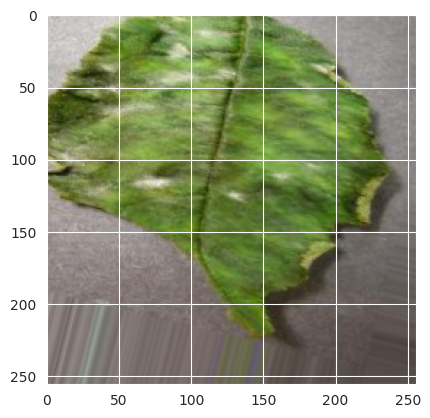

(20, 256, 256, 3)


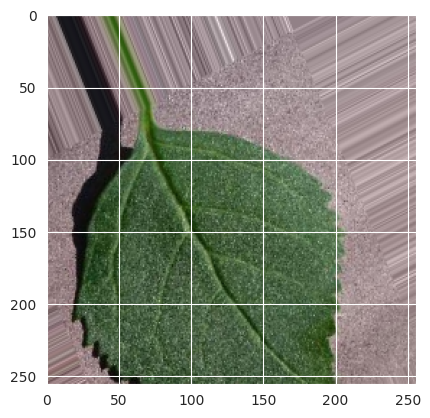

(20, 256, 256, 3)


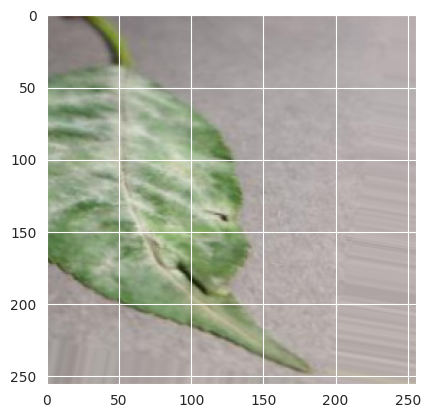

(20, 256, 256, 3)


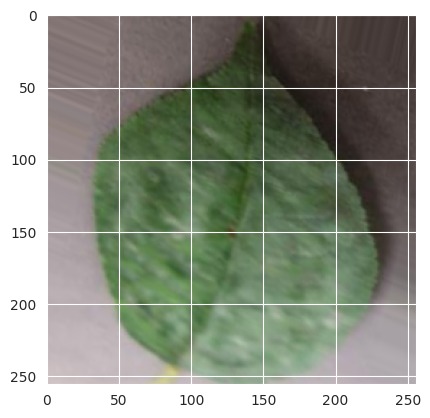

(20, 256, 256, 3)


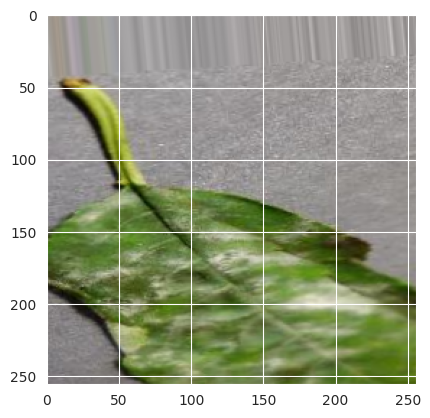

Validation Set
(20, 256, 256, 3)


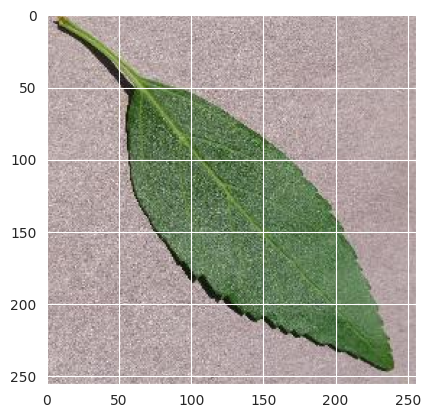

(20, 256, 256, 3)


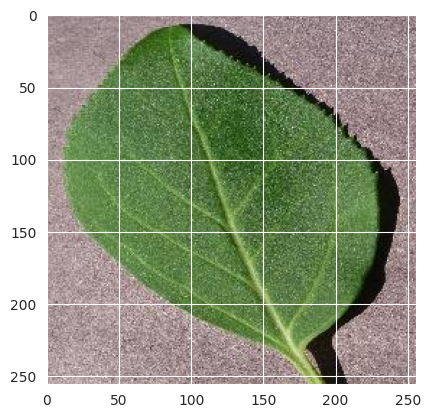

(20, 256, 256, 3)


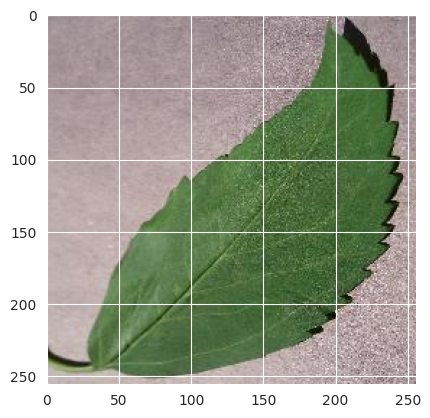

(20, 256, 256, 3)


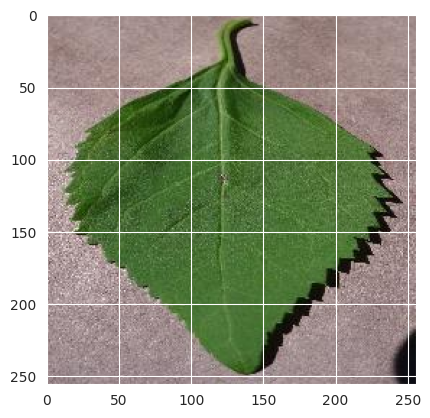

(20, 256, 256, 3)


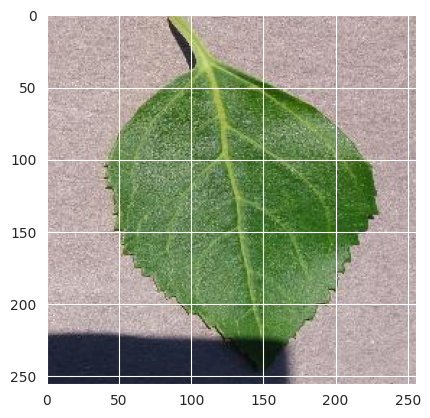

Test Set
(20, 256, 256, 3)


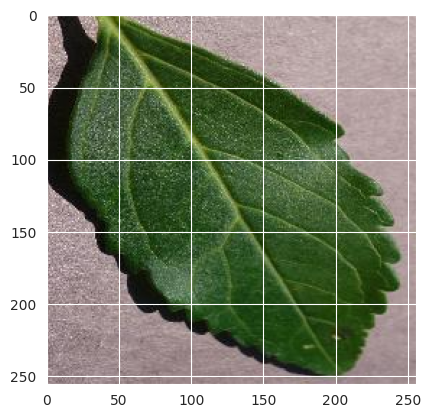

(20, 256, 256, 3)


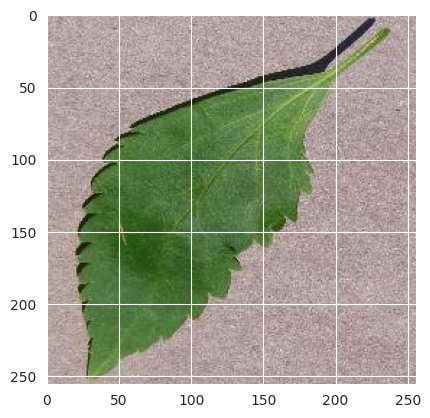

(20, 256, 256, 3)


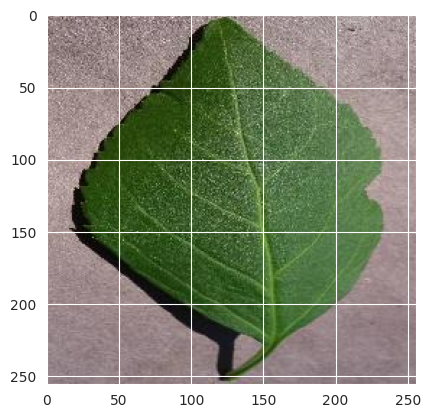

(20, 256, 256, 3)


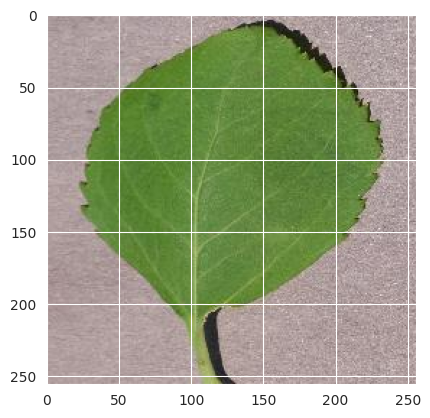

(20, 256, 256, 3)


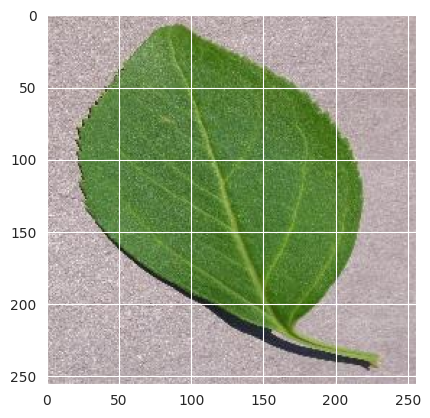

In [13]:
sets = {"Train": train_set, "Validation": val_set, "Test": test_set}
for name, set in sets.items():
    print(f"{name} Set")
    for _ in range(5):
        X, y = set.next()
        print(X.shape)
        plt.imshow(X[0])
        plt.show()

In [14]:
# Save train set class indices
if "train_set_class_indices.pkl" not in file_path:
    joblib.dump(value=train_set.class_indices, filename=f"{file_path}/train_set_class_indices.pkl")

---

# Creating the Model

In [15]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D

n_labels = 2

def create_tf_model(input_shape, n_labels):
    """
    Function to define a sequential model which will
    arrange a sequence of layers in the neural network.
    Parameters are - input shape, which will be the image 
    shape and n_labels, where n is the number of labels.
    """
    model = Sequential()
    
    # Apply filters to the images to capture dominant patterns
    model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation="relu",))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=input_shape, activation="relu",))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=input_shape, activation="relu",))
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Flatten the image matrix into a single list of all values
    model.add(Flatten())
    
    model.add(Dense(128, activation="relu"))
    # Add a dropout layer to reduce overfitting
    model.add(Dropout(0.3))

    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) 

    return model

In [16]:
model = create_tf_model(input_shape=image_shape, n_labels=n_labels)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 16)      4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0

2023-03-23 18:09:11.682204: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Early Stopping

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

### Fit Model

In [18]:
model.fit(train_set,
          epochs=20,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data = val_set,
          callbacks=early_stopping,
          verbose=1)

2023-03-23 18:09:12.603539: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
147/147 [==============================] - 159s 1s/step - loss: 0.3661 - accuracy: 0.8066 - val_loss: 0.1788 - val_accuracy: 0.9383
Epoch 2/20
147/147 [==============================] - 177s 1s/step - loss: 0.0676 - accuracy: 0.9802 - val_loss: 0.0468 - val_accuracy: 0.9905
Epoch 3/20
147/147 [==============================] - 137s 926ms/step - loss: 0.1209 - accuracy: 0.9586 - val_loss: 0.0573 - val_accuracy: 0.9905
Epoch 4/20
147/147 [==============================] - 129s 871ms/step - loss: 0.0346 - accuracy: 0.9877 - val_loss: 0.0073 - val_accuracy: 0.9953
Epoch 5/20
147/147 [==============================] - 203s 1s/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0593 - val_accuracy: 0.9858
Epoch 6/20
147/147 [==============================] - 198s 1s/step - loss: 0.0469 - accuracy: 0.9839 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 7/20
147/147 [==============================] - 179s 1s/step - loss: 0.0275 - accuracy: 0.9904 - val_loss: 0.0044 - val_accuracy: 

KeyboardInterrupt: 

### Save Model

In [19]:
if "mildew_detector.h5" not in {file_path}:
    model.save(f"{file_path}/mildew_detector.h5")

---

# Model Evaluation

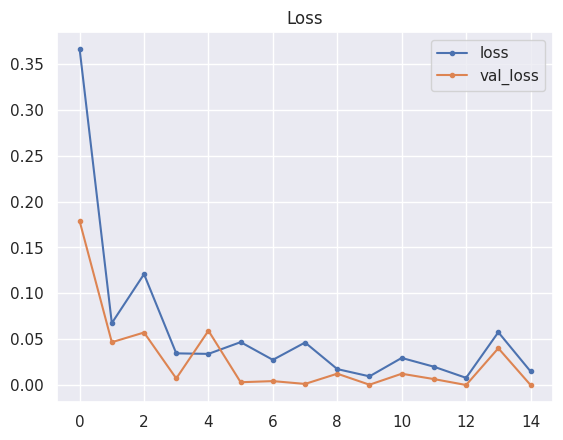

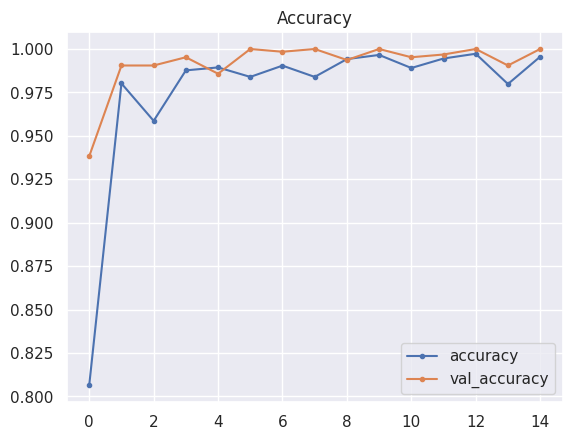

In [30]:
losses = pd.DataFrame(model.history.history)

sns.set_style("darkgrid")

losses[["loss", "val_loss"]].plot(style=".-")
plt.title("Loss")
if "model_loss.png" not in {file_path}:
    plt.savefig(f"{file_path}/model_loss.png")
plt.show()

losses[["accuracy", "val_accuracy"]].plot(style=".-")
plt.title("Accuracy")
if "model_accuracy.png" not in {file_path}:
    plt.savefig(f"{file_path}/model_accuracy.png")
plt.show()